# Matriz de Correlación

Una matriz de correlación es una herramienta estadística que permite analizar y resumir las relaciones lineales entre un conjunto de variables. Esta matriz presenta los coeficientes de correlación entre pares de variables en forma tabular, lo que facilita identificar patrones, asociaciones y posibles relaciones de dependencia dentro de los datos.

El coeficiente de correlación, generalmente calculado como el coeficiente de Pearson, es un valor numérico que mide la fuerza y dirección de la relación lineal entre dos variables. Este coeficiente tiene un rango entre -1.0 y 1.0:

1.0: Indica una correlación positiva perfecta, donde ambas variables aumentan o disminuyen juntas de manera proporcional.
0.0: Representa la ausencia de correlación lineal entre las variables, aunque pueden existir relaciones no lineales.
-1.0: Indica una correlación negativa perfecta, donde una variable aumenta mientras la otra disminuye de manera proporcional.

El `coeficiente de correlación de Pearson` es una medida de la relación lineal entre dos variables aleatorias 
cuantitativas. Este coeficiente es independiente de la escala de medida de las variables:

$$r=\frac{n\sum_{i=1}^n (x_i y_i) - (\sum_{i=1}^n x_i )*(\sum_{i=1}^n y_i)}{\sqrt{(n\sum_{i=1}^n x_{i}^2 - (\sum_{i=1}^n x_i)^2)(n\sum_{i=1}^n y_{i}^2 - (\sum_{i=1}^n y_i)^2) }}$$  

Analicemos entonces la relación de cada variable entre ellas.

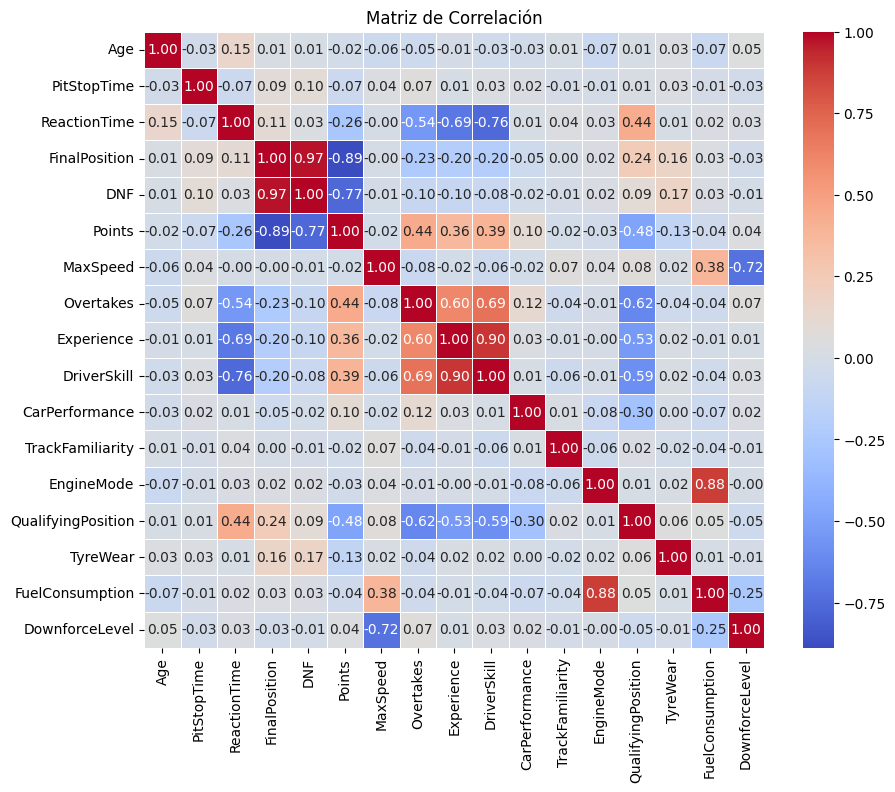

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import norm 
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

f1 = pd.read_csv('formula1_enhanced_data.csv')


# Filtrar columnas numéricas
numeric_columns = f1.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

*Presentamos muchas variables que notamos que no cumplen una relación con el resto, entonces no nos serán tan útiles en nuestro estudio estadístico de correlación*

Hagamos un filtrado para desechar variables.

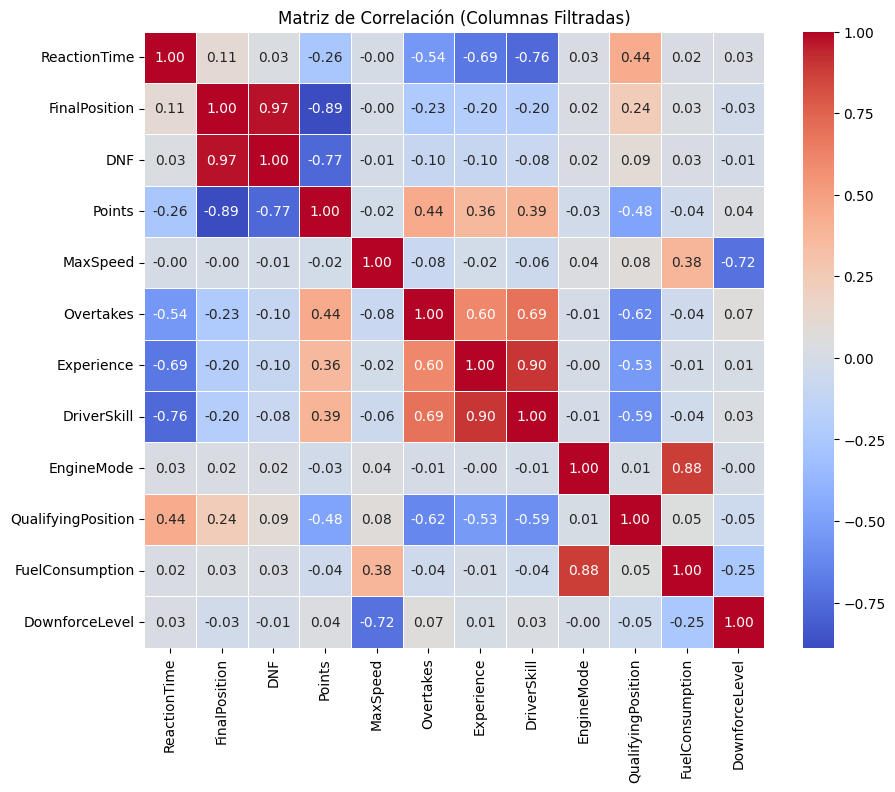

In [3]:
columns_to_exclude = ['Age', 'PitStopTime', 'TrackFamiliarity', 'TyreWear', 'CarPerformance']

# Filtrar columnas numéricas excluyendo las especificadas
numeric_columns_filtered = f1.select_dtypes(include=['number']).drop(columns=columns_to_exclude, axis=1)

# Calcular la matriz de correlación con las columnas filtradas
correlation_matrix = numeric_columns_filtered.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (Columnas Filtradas)')
plt.show()

### Detalles importantes:

#### Relaciones más fuertes (positivas):

1. `FinalPosition` y `DNF` tienen una correlación cercana a 0.97, indicando que hay una fuerte relación positiva. A medida que una aumenta, la otra también lo hace.

2. `DriverSkill` y `Experience` presentan una alta correlación positiva (0.90), lo cual tiene sentido, ya que los conductores más experimentados tienden a tener mayor habilidad.

3. `EngineMode` y `FuelConsumption` presenta una alta correlación positiva (0.88) , lo cual debido a que un motor configurado en un modo de alto rendimiento (por ejemplo, mayor potencia para maximizar la velocidad) probablemente consuma más combustible debido al aumento en la demanda de energía.

#### Relaciones más fuertes (negativas):

4. `Points` y `FinalPosition` tienen una fuerte correlación negativa (-0.89), lo que indica que un mejor puesto (menor número) está asociado con más puntos.

5. `ReactionTime` y `DriverSkill` presentan una correlación negativa significativa (-0.76), sugiriendo que los conductores con mejores habilidades tienden a reaccionar más rápido.


#### Relaciones interesantes:

6. `DownforceLevel` y `MaxSpeed` tienen una correlación negativa (-0.72), lo que podría indicar que una configuración de menor fuerza descendente está relacionada con mayor velocidad. 

7. `Overtakes` y `DriverSkill` tienen una correlación positiva moderada (0.69), sugiriendo que la habilidad del conductor influye en la capacidad para adelantar.

## Tabla de Contigencia

La tabla de contingencia se utiliza principalmente para analizar la relación entre variables categóricas o cualitativas, no numéricas. Es una herramienta estadística que ayuda a contar la frecuencia con la que ocurren ciertas combinaciones de categorías de dos o más variables, permitiendo observar patrones o asociaciones.

Analicemos entonces la relación que existen entre nuestras variables no numéricas: `Team`, `Driver`, `Circuit`, `WeatherCondition`, `TyreCompound`

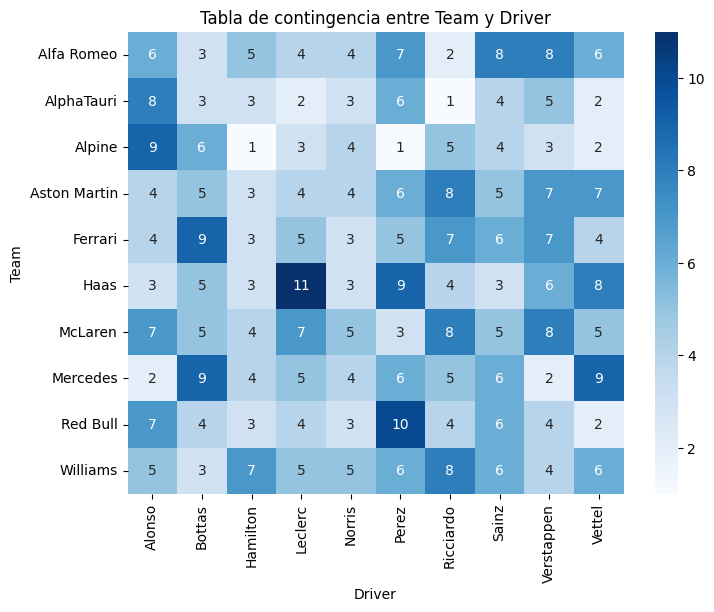

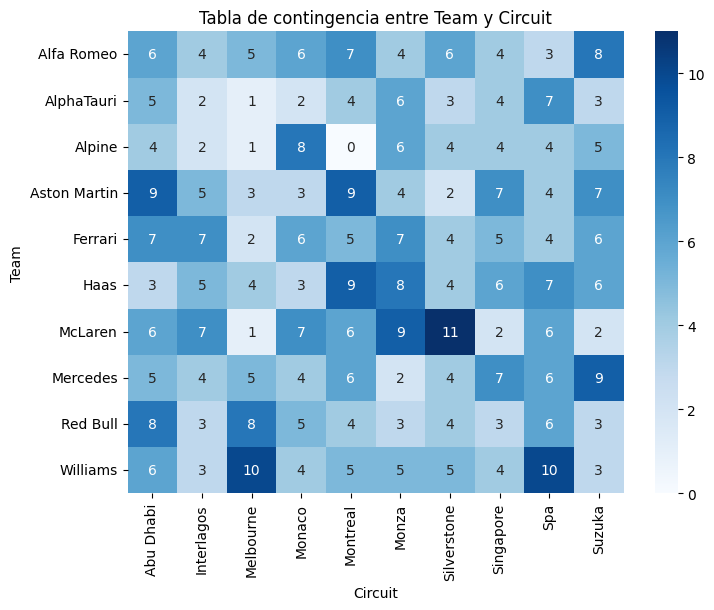

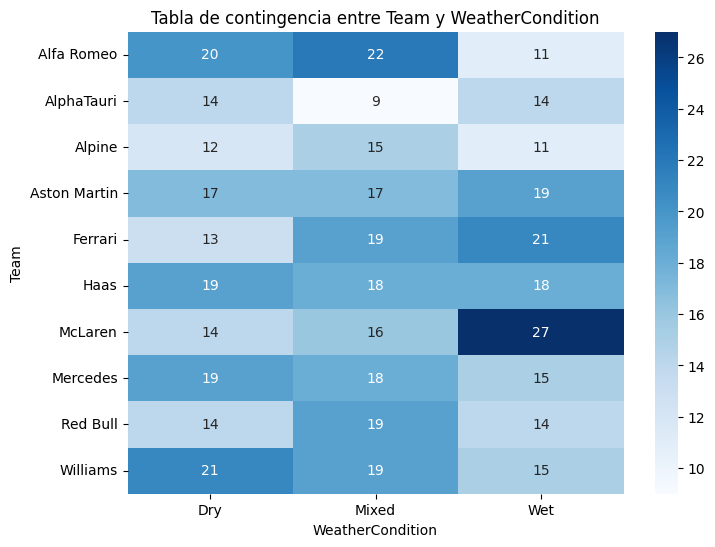

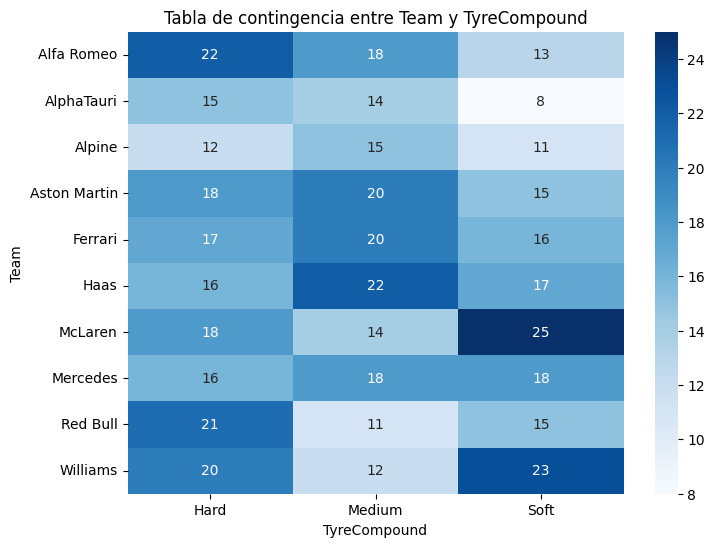

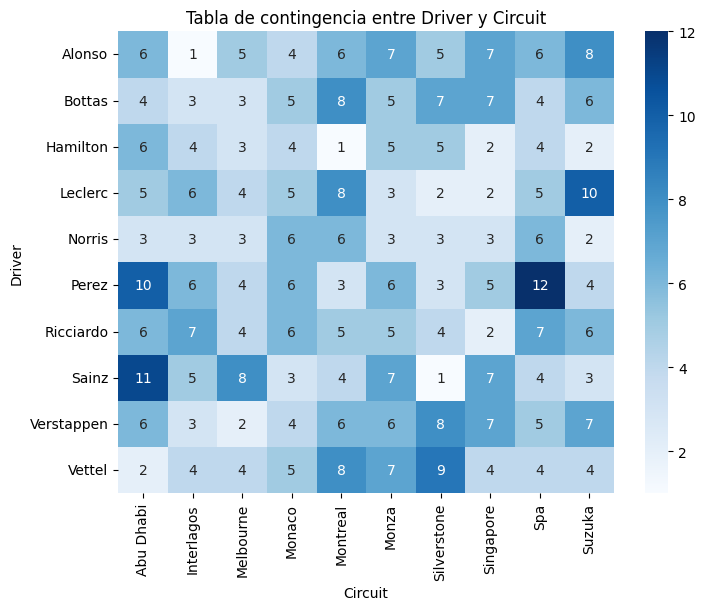

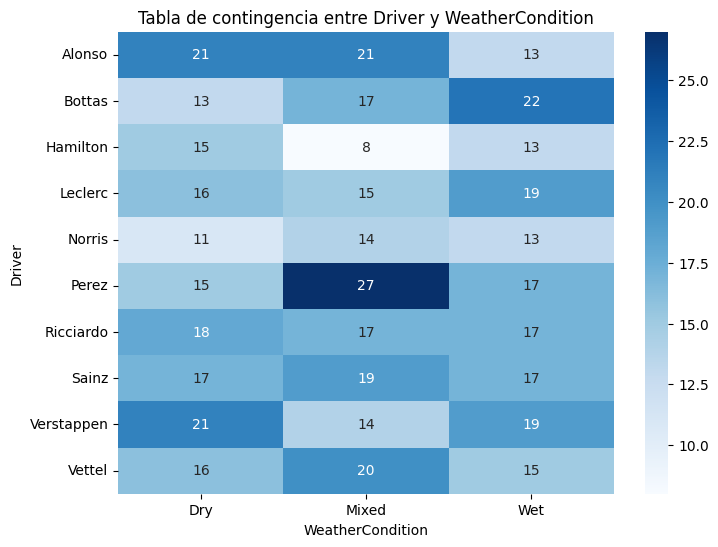

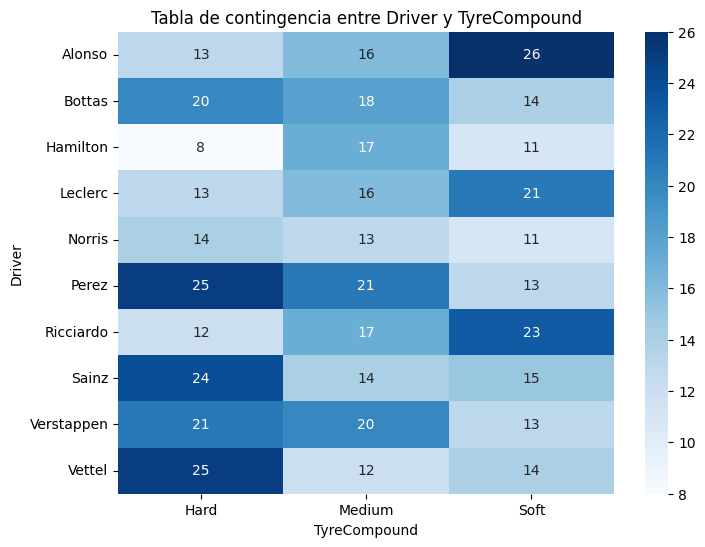

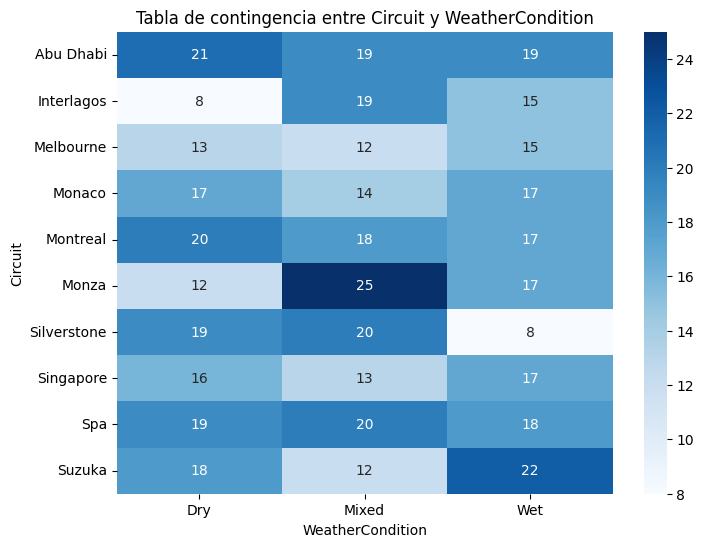

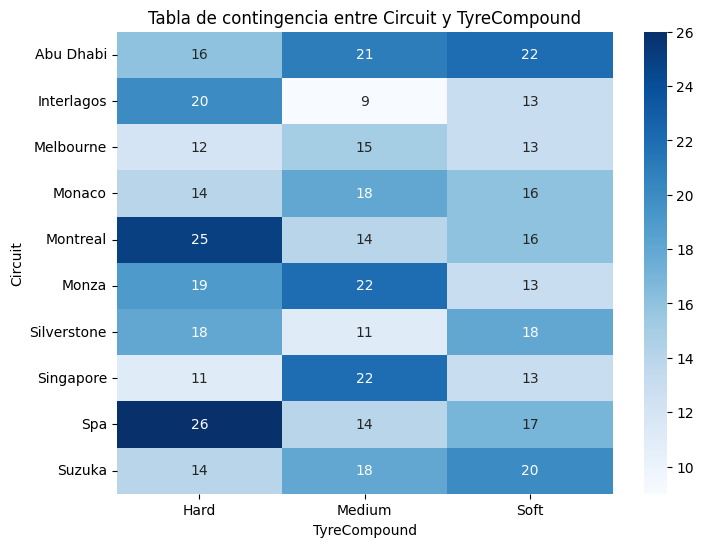

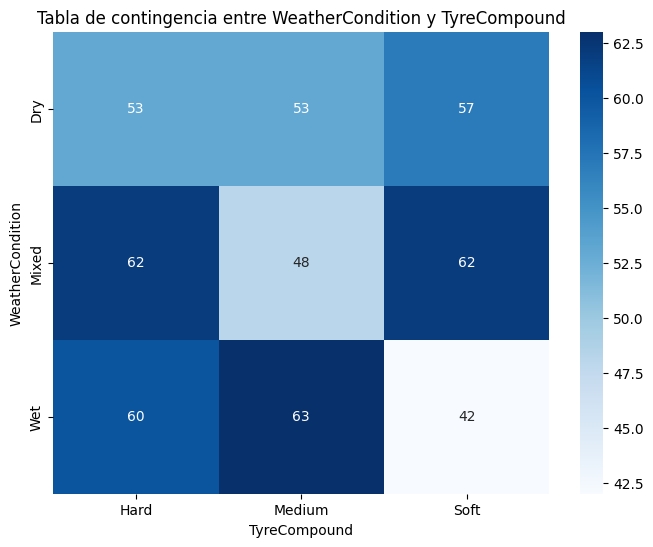

In [39]:
# Filtrar las columnas numéricas (no categóricas)
# Puedes ajustar esta parte según las columnas de tu CSV
categorical_columns = ['Team','Driver','Circuit','WeatherCondition','TyreCompound']

# Crear las tablas de contingencia entre cada par de columnas numéricas
for i in range (len(categorical_columns)):
    for j in range(i,len(categorical_columns)):
        if i != j:  # Evitar crear la tabla de contingencia de una variable consigo misma
            contingency_table = pd.crosstab(f1[categorical_columns[i]], f1[categorical_columns[j]])

            # Visualización con un heatmap
            plt.figure(figsize=(8, 6))
            sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=True)
            plt.title(f"Tabla de contingencia entre {categorical_columns[i]} y {categorical_columns[j]}")
            plt.xlabel(categorical_columns[j])
            plt.ylabel(categorical_columns[i])
            plt.show()



`Soft` y `Wet` (42): En 42 ocasiones, se usó un neumático "Soft" en condiciones "Wet". Aunque los neumáticos blandos ofrecen excelente agarre en condiciones secas y mixtas, su desempeño en condiciones completamente mojadas no es tan bueno como el de los neumáticos de compuesto intermedio o de lluvia. Sin embargo, en condiciones húmedas o mojadas moderadas, algunos equipos pueden haber utilizado neumáticos blandos si el clima estaba mejorando y la pista estaba secándose.

`Medium` y `Wet` (63): El compuesto "Medium" se usó 63 veces en condiciones "Wet". Esto tiene sentido, ya que los neumáticos medianos son adecuados para condiciones de lluvia ligera a moderada, ya que ofrecen un mejor agarre en superficies mojadas que los duros.

La prueba de `Chi-Cuadrado` de Independencia es una herramienta estadística fundamental para verificar si existe una relación entre dos variables categóricas. En nuestro caso, se puede usar para evaluar la relación entre `WeatherCondition` y `TyreCompound`.

#### Hipótesis:
- **𝐻₀**: No están relacionados. Hay independencia entre las variables.
- **𝐻₁**: Están relacionados. No hay independencia.

#### Pasos de la prueba:
1. **Fijar α**:
   - Valores posibles para 𝛼: 0.01; 0.05; 0.10. Si no se especifica, se elige 𝛼 = 0.05.

2. **Estadístico de la prueba**:

   El estadístico **𝜒²** se calcula de la siguiente manera:
   $
   \chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(n_{ij} - e_{ij})^2}{e_{ij}}
   $
   Donde:
   - $n_{ij}$ es la frecuencia observada en la celda $i, j$.
   - $e_{ij}$ es la frecuencia esperada en la celda $i, j$, que se calcula como:
     $
     e_{ij} = \frac{n_i * n_j}{n}
     $
     - $n_i$ es el total de la fila $i$.
     - $n_j$ es el total de la columna $j$.
     - $n$ es el total general de la tabla.

3. **Región crítica**:
   Para rechazar la hipótesis nula, la estadística de la prueba debe cumplir:
   $
   \chi^2 > \chi^2_{1-\alpha} \left( (r-1) \cdot (c-1) \right)
   $
   Donde:
   - $r$ es el número de filas.
   - $c$ es el número de columnas.

---

In [9]:

# Supongamos que f1 ya está definido con tus datos.
contingency_table = pd.crosstab(f1['WeatherCondition'], f1['TyreCompound'])

# Calcular las frecuencias esperadas
total_filas = contingency_table.sum(axis=1)  # Total por fila
total_columnas = contingency_table.sum(axis=0)  # Total por columna
total_general = contingency_table.sum().sum()  # Total general

# Matriz de frecuencias esperadas
expected = np.outer(total_filas, total_columnas) / total_general

# Calcular el estadístico Chi-cuadrado
chi_squared_stat = 0

for i in range(contingency_table.shape[0]):
    for j in range(contingency_table.shape[1]):
        observed = contingency_table.iloc[i, j]  # Observado
        expected_value = expected[i, j]         # Esperado
        chi_squared_stat += ((observed - expected_value) ** 2) / expected_value

# Calcular los grados de libertad
rows, cols = contingency_table.shape
dof = (rows - 1) * (cols - 1)
alpha = 0.05

# Imprimir los resultados
print(f'Estadístico Chi-cuadrado: {chi_squared_stat}')
print(f'Grados de libertad: {dof}')
print(f'Frecuencias esperadas:\n{expected}')

critical_value = chi2.ppf(1 - alpha, dof) # Aproximadamente para 2 grados de libertad y α = 0.05

# Comparar el valor de la prueba con el valor crítico
if chi_squared_stat > critical_value:
    print(f'Rechazamos la hipótesis nula. Las variables no son independientes.')
else:
    print(f'Aceptamos la hipótesis nula. Las variables son independientes.')



Estadístico Chi-cuadrado: 6.655657121464831
Grados de libertad: 4
Frecuencias esperadas:
[[57.05  53.464 52.486]
 [60.2   56.416 55.384]
 [57.75  54.12  53.13 ]]
Aceptamos la hipótesis nula. Las variables son independientes.
